<a href="https://colab.research.google.com/github/vvsrupesh/Colab-Notebooks/blob/main/salaray_experience_ml_line_regre5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class Linear_Regression:


# initiating the  parameters (learning rate and no of iterations )
 def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



 def fit(self, X ,Y ):
    # no of examples and no of features


   self.m,self.n = X.shape    # no of rows and columns


    # initiating weights and bias
   self.w = np.zeros(self.n)
   self.b = 0
   self.X = X
   self.Y = Y

   # implementing gradient descent
   for i in range(self.no_of_iterations):
      self.update_weights()



 def update_weights(self,):
   Y_prediction = self.predict(self.X)

   # calculating gradients
   dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

   db = - 2 * np.sum(self.Y - Y_prediction) / self.m

   #update the weights
   self.w = self.w - self.learning_rate * dw
   self.b = self.b - self.learning_rate * db




 def predict(self, X):
  return X.dot(self.w) + self.b

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail(

)

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,-1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=2)

In [ ]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
print('weight =', model.w[0])
print('bias =', model.b)

weight = 9514.400999035135
bias = 23697.406507136307


In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


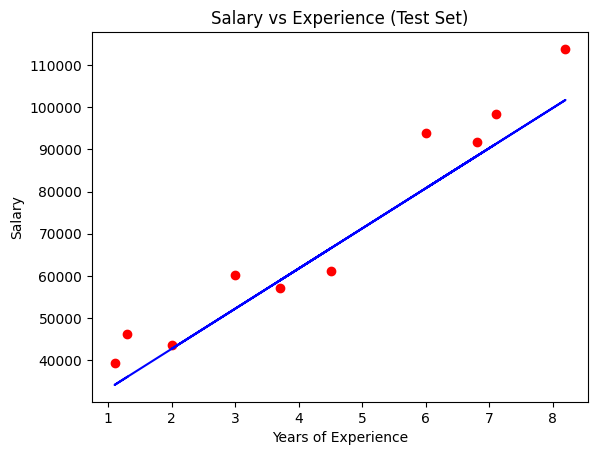

In [ ]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Test Set)')
plt.show()